In [1]:
import PIL as pil
from matplotlib import pyplot as plt
import numpy as np
import math

In [36]:
# Define some common functions
def img2array(img):
    nrow = img.size[1]
    ncol = img.size[0]
    img_map = img.load()
    myarray = np.zeros([nrow,ncol,3], dtype=np.uint8)
    for i in range(nrow):
        for j in range(ncol):
            myarray[i,j,0] = img_map[j,i][0]
            myarray[i,j,1] = img_map[j,i][1]
            myarray[i,j,2] = img_map[j,i][2]
    return myarray

def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

def gaussian_kernel(size, sigma=1):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return g

mygauss = gaussian_kernel(5, sigma=1.4)

def applyGaussFilter(image, kernel):
    n, m = image.shape
    new_image = np.zeros([n,m])
    
    for i in range(0,n):
        for j in range(0,m):
            mysum = 0; 
            if i-2 >= 0 and i-2 < n and j-2 >= 0 and j-2 < m:
                mysum = mysum + image[i-2,j-2]*kernel[0,0]
            if i-2 >= 0 and i-2 < n and j-1 >= 0 and j-1 < m:
                mysum = mysum + image[i-2,j-1]*kernel[0,1]
            if i-2 >= 0 and i-2 < n and j >= 0 and j < m:
                mysum = mysum + image[i-2,j]*kernel[0,2]
            if i-2 >= 0 and i-2 < n and j+1 >= 0 and j+1 < m:
                mysum = mysum + image[i-2,j+1]*kernel[0,3]
            if i-2 >= 0 and i-2 < n and j+2 >= 0 and j+2 < m:
                mysum = mysum + image[i-2,j+2]*kernel[0,4]
            if i-1 >= 0 and i-1 < n and j-2 >= 0 and j-2 < m:
                mysum = mysum + image[i-1,j-2]*kernel[1,0]
            if i-1 >= 0 and i-1 < n and j-1 >= 0 and j-1 < m:
                mysum = mysum + image[i-1,j-1]*kernel[1,1]
            if i-1 >= 0 and i-1 < n and j >= 0 and j < m:
                mysum = mysum + image[i-1,j]*kernel[1,2]
            if i-1 >= 0 and i-1 < n and j+1 >= 0 and j+1 < m:
                mysum = mysum + image[i-1,j+1]*kernel[1,3]
            if i-1 >= 0 and i-1 < n and j+2 >= 0 and j+2 < m:
                mysum = mysum + image[i-1,j+2]*kernel[1,4]
            if i >= 0 and i < n and j-2 >= 0 and j-2 < m:
                mysum = mysum + image[i,j-2]*kernel[2,0]
            if i >= 0 and i < n and j-1 >= 0 and j-1 < m:
                mysum = mysum + image[i,j-1]*kernel[2,1]
            if i >= 0 and i < n and j >= 0 and j < m:
                mysum = mysum + image[i,j]*kernel[2,2]
            if i >= 0 and i < n and j+1 >= 0 and j+1 < m:
                mysum = mysum + image[i,j+1]*kernel[2,3]
            if i >= 0 and i < n and j+2 >= 0 and j+2 < m:
                mysum = mysum + image[i,j+2]*kernel[2,4]
            if i+1 >= 0 and i+1 < n and j-2 >= 0 and j-2 < m:
                mysum = mysum + image[i+1,j-2]*kernel[3,0]
            if i+1 >= 0 and i+1 < n and j-1 >= 0 and j-1 < m:
                mysum = mysum + image[i+1,j-1]*kernel[3,1]
            if i+1 >= 0 and i+1 < n and j >= 0 and j < m:
                mysum = mysum + image[i+1,j]*kernel[3,2]
            if i+1 >= 0 and i+1 < n and j+1 >= 0 and j+1 < m:
                mysum = mysum + image[i+1,j+1]*kernel[3,3]
            if i+1 >= 0 and i+1 < n and j+2 >= 0 and j+2 < m:
                mysum = mysum + image[i+1,j+2]*kernel[3,4]
            if i+2 >= 0 and i+2 < n and j-2 >= 0 and j-2 < m:
                mysum = mysum + image[i+2,j-2]*kernel[4,0]
            if i+2 >= 0 and i+2 < n and j-1 >= 0 and j-1 < m:
                mysum = mysum + image[i+2,j-1]*kernel[4,1]
            if i+2 >= 0 and i+2 < n and j >= 0 and j < m:
                mysum = mysum + image[i+2,j]*kernel[4,2]
            if i+2 >= 0 and i+2 < n and j+1 >= 0 and j+1 < m:
                mysum = mysum + image[i+2,j+1]*kernel[4,3]
            if i+2 >= 0 and i+2 < n and j+2 >= 0 and j+2 < m:
                mysum = mysum + image[i+2,j+2]*kernel[4,4]
            new_image[i,j] = mysum
                
    return new_image

def calculateGradient(img):
    m, n = img.shape
    Gx = np.zeros([m, n])
    Gy = np.zeros([m, n])
    G = np.zeros([m,n])
    theta = np.zeros([m,n])
    for i in range(1,m-1):
        for j in range(1,n-1):
            Gx[i, j] = 1.0*img[i+1,j-1] + 2.0*img[i+1,j] + 1.0*img[i+1,j+1] - 1.0*img[i-1,j-1] - 2.0*img[i-1,j] - 1.0*img[i-1,j+1]
            Gy[i, j] = - 1.0*img[i-1,j+1] - 2.0*img[i,j+1] - 1.0*img[i+1,j+1] + 1.0*img[i-1,j-1] + 2.0*img[i,j-1] + 1.0*img[i+1,j-1]
            G[i,j] = math.sqrt(Gx[i,j]*Gx[i,j]+Gy[i,j]*Gy[i,j])
            if Gy[i,j]!=0:
                theta[i,j] = math.atan(Gx[i,j]/Gy[i,j])
            
    return Gx,Gy,G,theta

def non_max_suppression(img, D):
    M, N = img.shape
    Z = np.zeros((M,N), dtype=np.int32)
    angle = D * 180. / np.pi
    angle[angle < 0] += 180

    
    for i in range(1,M-1):
        for j in range(1,N-1):
            try:
                q = 255
                r = 255
                
               #angle 0
                if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
                    q = img[i, j+1]
                    r = img[i, j-1]
                #angle 45
                elif (22.5 <= angle[i,j] < 67.5):
                    q = img[i+1, j-1]
                    r = img[i-1, j+1]
                #angle 90
                elif (67.5 <= angle[i,j] < 112.5):
                    q = img[i+1, j]
                    r = img[i-1, j]
                #angle 135
                elif (112.5 <= angle[i,j] < 157.5):
                    q = img[i-1, j-1]
                    r = img[i+1, j+1]

                if (img[i,j] >= q) and (img[i,j] >= r):
                    Z[i,j] = img[i,j]
                else:
                    Z[i,j] = 0

            except IndexError as e:
                pass
    
    return Z

def threshold(img, lowThresholdRatio=0.05, highThresholdRatio=0.09):
    
    highThreshold = img.max() * highThresholdRatio;
    lowThreshold = highThreshold * lowThresholdRatio;
    
    M, N = img.shape
    img_out = np.zeros((M,N), dtype=np.int32)
    
    weak = np.int32(100)
    strong = np.int32(255)

    for i in range(0, M):
        for j in range(0, N):
            if img[i,j]>= highThreshold:
                img_out[i,j] = strong
            elif img[i,j] < highThreshold and img[i,j] >= lowThreshold:
                img_out[i,j] = weak
            else:
                img_out[i,j] = 0
    
    return (img_out, weak, strong)

def hysteresis(img, weak, strong=255):
    M, N = img.shape  
    img_out = np.copy(img)
    for i in range(1, M-1):
        for j in range(1, N-1):
            if (img_out[i,j] == weak):
                try:
                    if ((img_out[i+1, j-1] == strong) or (img_out[i+1, j] == strong) or (img_out[i+1, j+1] == strong)
                        or (img_out[i, j-1] == strong) or (img_out[i, j+1] == strong)
                        or (img_out[i-1, j-1] == strong) or (img_out[i-1, j] == strong) or (img_out[i-1, j+1] == strong)):
                        img_out[i, j] = strong
                    else:
                        img_out[i, j] = 0
                except IndexError as e:
                    pass
    return img_out

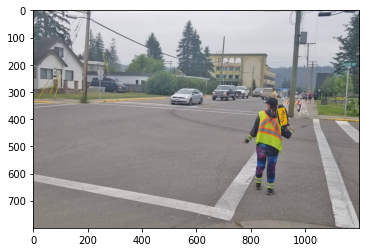

In [15]:
apic = pil.Image.open("../Image/ForLDW.jpeg")
myimg = img2array(apic)
plt.imshow(myimg)

In [16]:
# Change to gray scale image
mygrayimg = rgb2gray(myimg)

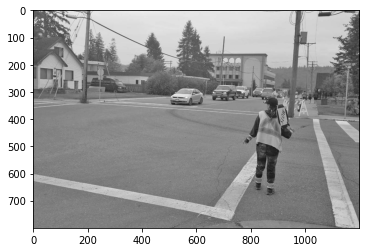

In [17]:
plt.imshow(mygrayimg, cmap='gray')

In [18]:
# Apply Gaussian Filter
mygraysmoothimg=applyGaussFilter(mygrayimg, mygauss)

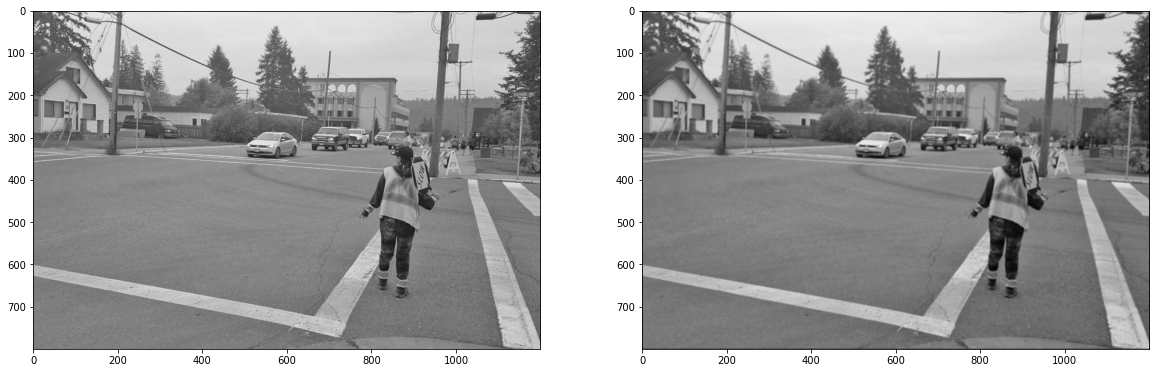

In [19]:
f, axarr = plt.subplots(1,2, figsize=(20,20))
axarr[0].imshow(mygrayimg, cmap='gray')
axarr[1].imshow(mygraysmoothimg, cmap='gray')

In [22]:
# Calculate Gradients and Angles
Gx, Gy, G, theta = calculateGradient(mygraysmoothimg)

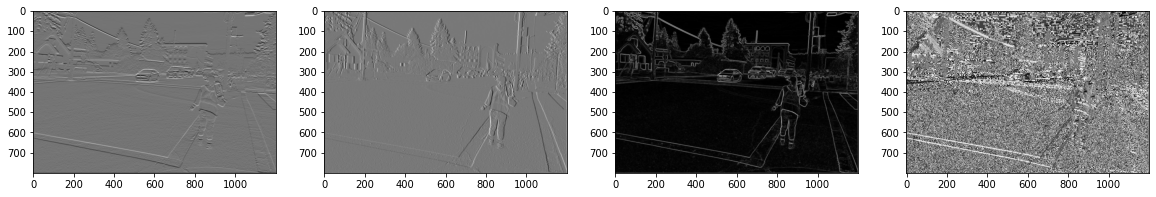

In [23]:
f, axarr = plt.subplots(1,4, figsize=(20, 10))
axarr[0].imshow(Gx, cmap='gray')
axarr[1].imshow(Gy, cmap='gray')
axarr[2].imshow(G, cmap='gray')
axarr[3].imshow(theta, cmap='gray')

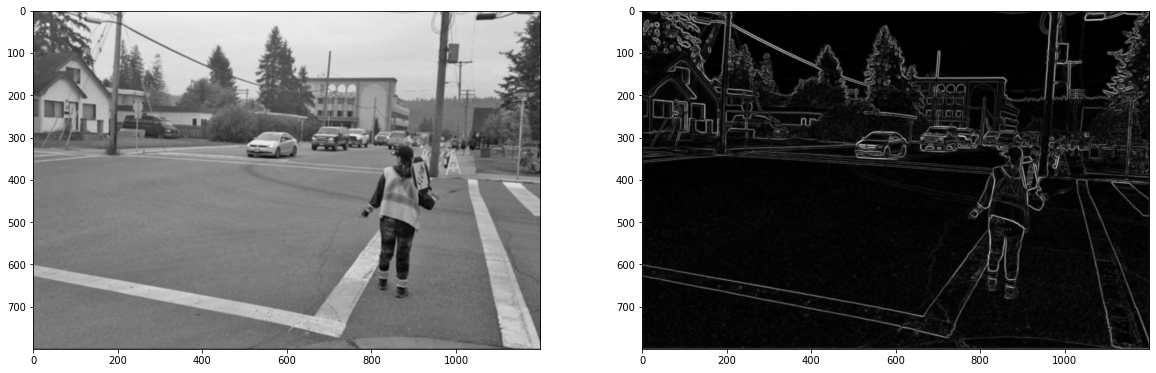

In [25]:
f, axarr = plt.subplots(1,2, figsize=(20, 10))
axarr[0].imshow(mygraysmoothimg, cmap='gray')
axarr[1].imshow(G, cmap='gray')

In [28]:
# Calculate Non Max Suppression
NMS_G = non_max_suppression(G, theta)

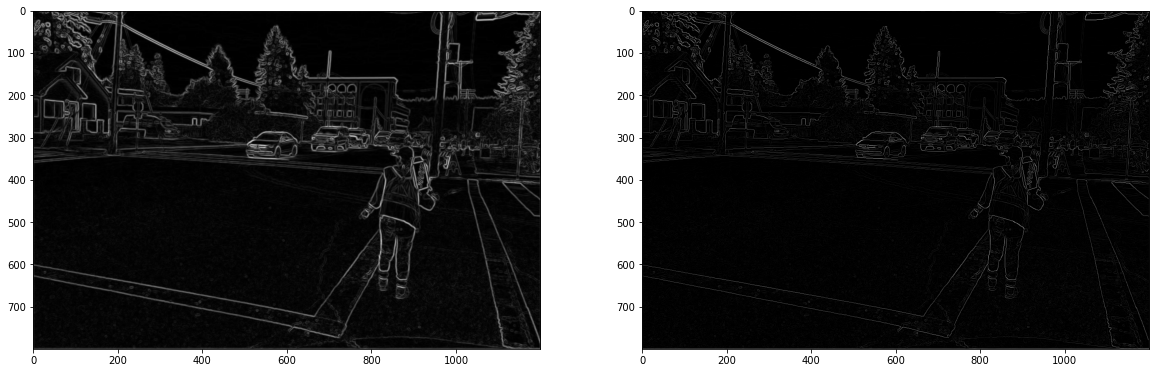

In [31]:
f, axarr = plt.subplots(1,2, figsize=(20, 10))
axarr[0].imshow(G, cmap='gray')
axarr[1].imshow(NMS_G, cmap='gray')

In [38]:
# Calculate double threshold
mythreshold, weak, strong = threshold(NMS_G, 0.001, 0.1)

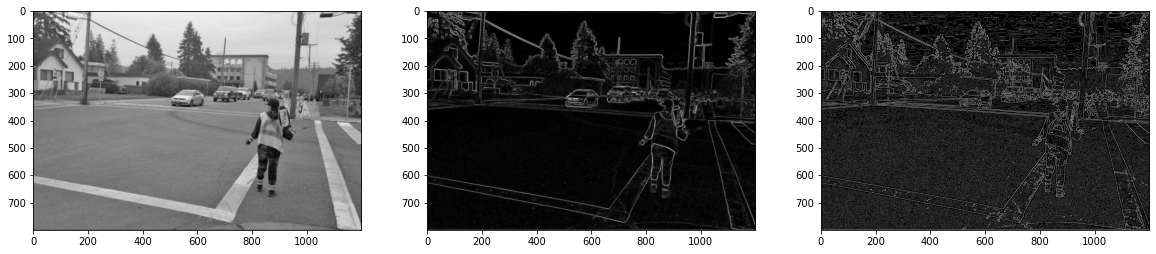

In [40]:
# Smooth vs. Gradient vs. Non Max Suppression Vs. Double thresholding
f, axarr = plt.subplots(1,3, figsize=(20, 20))
axarr[0].imshow(mygraysmoothimg, cmap='gray')
axarr[1].imshow(G, cmap='gray')
axarr[2].imshow(mythreshold, cmap='gray')

In [42]:
myhysteresis = hysteresis(mythreshold, weak)

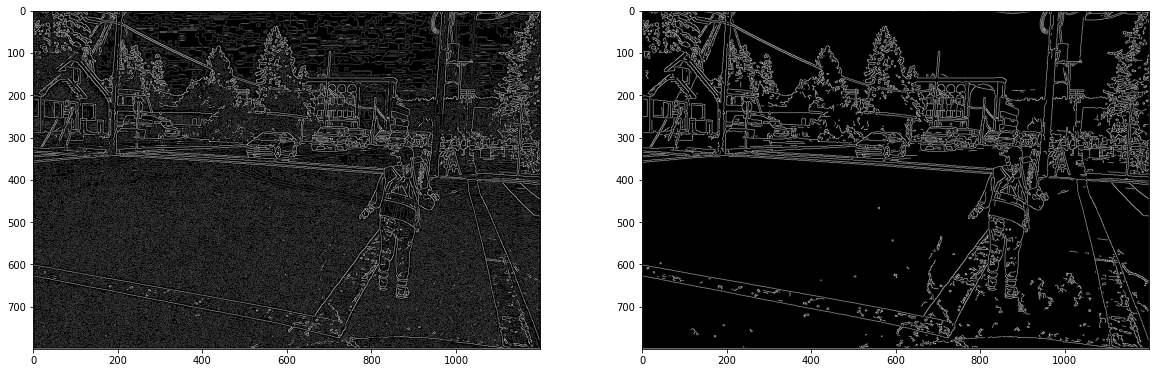

In [43]:
# Smooth vs. Gradient vs. Non Max Suppression Vs. Double thresholding Vs. Hysteresis
f, axarr = plt.subplots(1,2, figsize=(20, 20))
axarr[0].imshow(mythreshold, cmap='gray')
axarr[1].imshow(myhysteresis, cmap='gray')